## predicting marriage year-Part1
this will include the certain process
1. Data preperation
2. machine learning modelling
3. model evaluation.
4. exporting the trained  model

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [307]:
## now loading the datasets.
df=pd.read_csv('age_of_marriage_data.csv')
df.head()


,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
0,1,female,"5'4""",NaN,others,Telugu,NaN,London,United Kingdom,21.0
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0


### Exploratory data analysis


In [308]:
df.shape

## this means we have in total of 2567 rows and 10 columns

(2567, 10)

In [309]:
## the total number of columns in the datasets
df.columns
print(len(df.columns))

10


In [310]:
## categorizing the features on the basis of their type
categorical_features=[features for features in df.columns if df[features].dtype=='O']
numerical_features=[features for features in df.columns if features not in categorical_features ]
categorical_features


print('the  number of categorical features are {}-->'.format(len(categorical_features)))
print(categorical_features)

print('the number of numerical features are {}-->'.format(len(numerical_features)))
print(numerical_features)

the  number of categorical features are 8-->
['gender', 'height', 'religion', 'caste', 'mother_tongue', 'profession', 'location', 'country']
the number of numerical features are 2-->
['id', 'age_of_marriage']


In [311]:
## checking if there are any missing values in the datasets
df.isnull().sum()

id                   0
gender              29
height             118
religion           635
caste              142
mother_tongue      164
profession         330
location           155
country             16
age_of_marriage     19
dtype: int64

In [312]:
##  for the features who are having the most missing values i.e religion,profession 
## using the random sample imputation for the datset.
features=['religion','profession']
for x in features:
    df[x]=df[x]
    random_sample=df[x].dropna().sample(df[x].isnull().sum(),random_state=0)
    random_sample.index=df[df[x].isnull()].index
    df.loc[df[x].isnull(),x]=random_sample
    
 

In [313]:
## again checking the null values in the datasets
df.isnull().sum()*100/len(df)

id                 0.000000
gender             1.129723
height             4.596806
religion           0.000000
caste              5.531749
mother_tongue      6.388781
profession         0.000000
location           6.038177
country            0.623296
age_of_marriage    0.740164
dtype: float64

In [314]:
## handling the missing values with 5 percent or more with the most recured value
features_to_be_replacedwith_mode=['caste','mother_tongue','location','height']
## calculating the mode for the following variables
for variable in features_to_be_replacedwith_mode:
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)

In [315]:
## checking the missing values again
df.isnull().sum()

id                  0
gender             29
height              0
religion            0
caste               0
mother_tongue       0
profession          0
location            0
country            16
age_of_marriage    19
dtype: int64

In [316]:
## dropping the gender and country missing values
def replace_with_mode(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)

In [317]:
replace_with_mode(df,'gender')
replace_with_mode(df,'country')

In [318]:
## checking the presence of any missing values
df.isnull().sum()

id                  0
gender              0
height              0
religion            0
caste               0
mother_tongue       0
profession          0
location            0
country             0
age_of_marriage    19
dtype: int64

In [319]:
replace_with_mode(df,'age_of_marriage')

In [320]:
df.isnull().sum()

id                 0
gender             0
height             0
religion           0
caste              0
mother_tongue      0
profession         0
location           0
country            0
age_of_marriage    0
dtype: int64

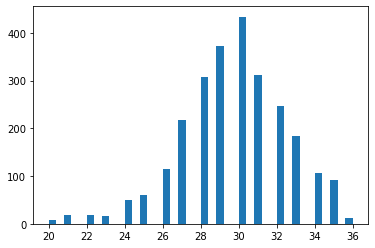

In [321]:
## now we dont have null values anymore
## checking if the dataset is imbalanced or not
plt.hist(df['age_of_marriage'],bins=40)
plt.show()

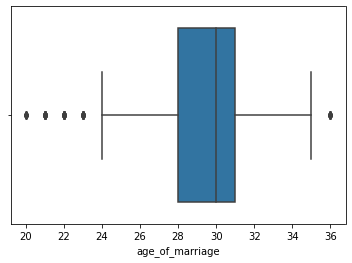

In [322]:
## checking the outliers if any
sns.boxplot(df['age_of_marriage'])

## removal of the outliers-
using the 3 standered deviation method


In [323]:
df['age_of_marriage'].std()

2.7921819900668523

In [324]:
upper_limit=df['age_of_marriage'].mean()+3* df['age_of_marriage'].std()
upper_limit

38.02750039170426

In [325]:
##similarly calculating the lower limit
lower_limit=df['age_of_marriage'].mean()-3*df['age_of_marriage'].std()
lower_limit

21.274408451303145

In [326]:
## removal of the outliers
df=df[(df['age_of_marriage']<upper_limit) & (df['age_of_marriage']>lower_limit)]
df.sample(10)

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
1991,1992,female,"5'5""",Hindu,Baishnab,Bengali,Not working,West Bengal,India,26.0
868,869,female,"5'1""",Hindu,Lingayath,Kannada,Not Specified,Belagavi / Belagaum,India,31.0
1144,1145,female,"5'6""",Hindu,Kalita,Assamese,Not Specified,Guwahati,India,27.0
671,672,male,"5'6""",Hindu,Brahmin,Marathi,Non IT Engineer (Others),Pune,India,32.0
31,32,male,"5'3""",Hindu,others,Hindi,Not working,Kannauj,India,27.0
127,128,female,"5'2""",Hindu,Viswabrahmin,Telugu,Not Specified,Hyderabad,India,27.0
1013,1014,male,"5'11""",Hindu,others,Hindi,Not working,Mumbai,India,30.0
2035,2036,female,"4'6""",Hindu,Ahom,Assamese,Banking Professional,Delhi,India,27.0
1009,1010,male,"5'11""",Hindu,Kayastha,Bengali,Software Professional,Hyderabad,India,35.0
2142,2143,female,"5'0""",Hindu,others,Hindi,Medical / Healthcare Professional (Others),Shahjahanpur,India,30.0


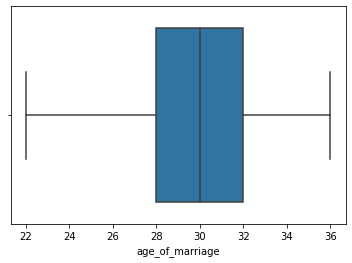

In [327]:
## now lets check if there are any outleirs present or not
sns.boxplot(df['age_of_marriage'])

now the outlers have been removed 

## data exploration-
taking out insights from the data and converting the categorical into numerical




In [328]:
df.columns

Index(['id', 'gender', 'height', 'religion', 'caste', 'mother_tongue',
       'profession', 'location', 'country', 'age_of_marriage'],
      dtype='object')

In [329]:
df['gender'].value_counts()

male      1352
female    1188
Name: gender, dtype: int64

In [330]:
df['height'].value_counts()

5'3"     337
5'6"     228
5'5"     225
5'4"     213
5'2"     212
5'7"     212
5'8"     188
5'0"     158
5'9"     135
5'1"     131
5'11"    117
5'10"    103
4'5"      78
6'0"      60
4'11"     30
4'6"      20
6'1"      19
4'10"     18
4'7"      16
4'8"      11
4'9"      10
6'2"       8
7'0"       4
6'3"       2
6'4"       2
6'10"      1
6'8"       1
6'5"       1
Name: height, dtype: int64

In [331]:
int(df.loc[1,'height'].split('\'')[0])*30.48


152.4

In [332]:
int(df.loc[1,'height'].split('\'')[1].replace('"',''))*2.54

17.78

In [333]:
int(df.loc[1,'height'].split('\'')[0])*30.48 + int(df.loc[1,'height'].split('\'')[1].replace('"',''))*2.54

170.18

In [334]:
def height_tocm(h):
    return int(h.split('\'')[0])*30.48 + int(h.split('\'')[1].replace('"',''))*2.54

In [335]:
df['height_cm']=df['height'].apply(height_tocm)

In [336]:
df.head()

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage,height_cm
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0,170.18
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0,170.18
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0,152.40
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0,165.10
5,6,male,"5'5""",Hindu,Valmiki,Hindi,Sportsman,Delhi,India,29.0,165.10


In [337]:
##dropping the height feature from the datset
df.drop('height',axis=1,inplace=True)

In [338]:
df.head()

,id,gender,religion,caste,mother_tongue,profession,location,country,age_of_marriage,height_cm
1,2,male,Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0,170.18
2,3,male,Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0,170.18
3,4,female,Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0,152.40
4,5,male,Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0,165.10
5,6,male,Hindu,Valmiki,Hindi,Sportsman,Delhi,India,29.0,165.10


In [339]:
## since location does not play important role in this so we will drop the loaction feature
df.drop('location',axis=1,inplace=True)

In [340]:
df.head(2)

,id,gender,religion,caste,mother_tongue,profession,country,age_of_marriage,height_cm
1,2,male,Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,USA,32.0,170.18
2,3,male,Hindu,Brahmin,Hindi,Entrepreneurs / Business,India,32.0,170.18


In [341]:
## also dropping id columns
df.drop('id',axis=1,inplace=True)

In [342]:
df.head(2)

,gender,religion,caste,mother_tongue,profession,country,age_of_marriage,height_cm
1,male,Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,USA,32.0,170.18
2,male,Hindu,Brahmin,Hindi,Entrepreneurs / Business,India,32.0,170.18


In [343]:
## data exploration
df['gender'].value_counts()
## using the one hot encoding

male      1352
female    1188
Name: gender, dtype: int64

In [344]:
df['country'].value_counts()

## using the label encoding


 India                   2237
 USA                      131
 Canada                    35
 United Arab Emirates      33
 United Kingdom            22
 Australia                 19
 Malaysia                  17
 Pakistan                   6
 New Zealand                6
 Kuwait                     5
 Bangladesh                 4
 Qatar                      3
 Singapore                  3
 Germany                    2
 Netherlands                2
 Oman                       2
 Italy                      1
 Sweden                     1
 Armenia                    1
 Bahrain                    1
 Japan                      1
 Nigeria                    1
 Myanmar                    1
 Philippines                1
 South Africa               1
 Ireland                    1
 Denmark                    1
 Hong Kong SAR              1
 Norway                     1
Name: country, dtype: int64

In [345]:
## using the one hot encoding in the gender
df=pd.get_dummies(df,columns=['gender'],drop_first=True)


In [346]:
df.head()

,religion,caste,mother_tongue,profession,country,age_of_marriage,height_cm,gender_male
1,Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,USA,32.0,170.18,1
2,Hindu,Brahmin,Hindi,Entrepreneurs / Business,India,32.0,170.18,1
3,Hindu,Thakur,Hindi,Architect,India,30.0,152.40,0
4,Christian,Born Again,Malayalam,Sales Professional / Marketing,India,30.0,165.10,1
5,Hindu,Valmiki,Hindi,Sportsman,India,29.0,165.10,1


In [347]:
## performing the label encoders  for the religion,caste,mother toungue,proffesion and country
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()

features_to_be_encoded=['religion','caste','mother_tongue','profession','country']
## assigning the numerical values and storing in the same column 
for variable in features_to_be_encoded:
    df[variable]=labelEncoder.fit_transform(df[variable])

In [348]:
df.head()

,religion,caste,mother_tongue,profession,country,age_of_marriage,height_cm,gender_male
1,2,34,6,22,26,32.0,170.18,1
2,1,14,8,25,8,32.0,170.18,1
3,1,36,8,7,8,30.0,152.40,0
4,0,13,13,70,8,30.0,165.10,1
5,1,38,8,76,8,29.0,165.10,1


In [349]:
df.columns

Index(['religion', 'caste', 'mother_tongue', 'profession', 'country',
       'age_of_marriage', 'height_cm', 'gender_male'],
      dtype='object')

In [350]:
## rearranging the final dataset
df=df[['religion', 'caste', 'mother_tongue', 'profession', 'country','height_cm', 'gender_male','age_of_marriage']]

In [351]:
df.head(2)

,religion,caste,mother_tongue,profession,country,height_cm,gender_male,age_of_marriage
1,2,34,6,22,26,170.18,1,32.0
2,1,14,8,25,8,170.18,1,32.0


## Model Creation-
1. will be dividing the model into depeindent and the independent features
2. then will be dividing the model in train test split.
3. using the algorithms in the creation of the model
4. using the performance matrix to evaluate the model 
5. craeting a model pickle file.

In [352]:
## dividing the features into dependednt and the independent features.
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [353]:
## splitting into train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### Linear Regression

In [354]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [355]:
## now predicting the values for the test data
prediction=regressor.predict(X_test)
prediction

array([28.9986517 , 30.41752385, 30.48375329, 30.06059576, 29.98752164,
       29.83963773, 29.45302609, 29.7547917 , 31.2419419 , 30.11839663,
       31.21542554, 29.92163037, 28.98612906, 29.17179955, 28.53685258,
       28.83639694, 29.93326273, 29.63568798, 29.80729717, 30.51913979,
       29.29487118, 31.13668516, 28.72943458, 29.28874177, 30.72552385,
       29.18222937, 29.986817  , 28.62602504, 28.74778188, 30.8411636 ,
       31.88876381, 30.80606006, 30.71355213, 29.09555685, 30.59297781,
       29.93229826, 28.82559375, 29.60425591, 29.2357364 , 30.81542549,
       28.70913645, 30.08951708, 28.35427273, 29.85879401, 29.93031629,
       28.85484505, 30.38369212, 29.98377819, 28.06183921, 29.73081591,
       28.43387939, 28.55729967, 30.01664515, 29.34423058, 30.67791124,
       30.98083696, 31.40929564, 30.50166038, 29.1420082 , 28.62783045,
       29.64319382, 29.47735414, 30.82294299, 29.82134535, 29.17205272,
       29.18682504, 28.83465502, 31.10572472, 30.26767389, 28.79

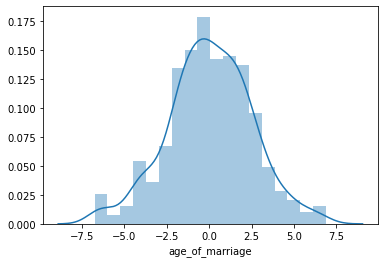

In [356]:
## plotting the prediction and the actual test results 
import seaborn
sns.distplot(y_test-prediction)

### performance matrix
1. using the mean sqaured error 
2. using the mean absolute error 
3. using the r2 -score

In [357]:
from sklearn import metrics
import numpy as np

print('the mean absolute error is ',metrics.mean_absolute_error(y_test,prediction))
print('the mean squared error is', metrics.mean_squared_error(y_test,prediction))

the mean absolute error is  1.954242694074265
the mean squared error is 6.21062897665579


In [358]:
from sklearn.metrics import r2_score
score=r2_score(y_test,prediction)
score

0.08436636991909374

## Random forest regressor

In [359]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

RandomForestRegressor()

In [360]:
## prediction
prediction=model.predict(X_test)

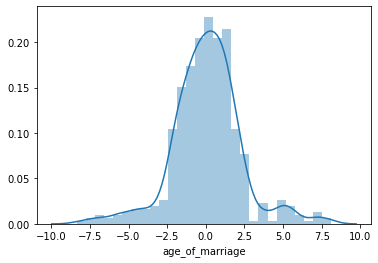

In [361]:
sns.distplot(y_test-prediction)

## performance matrix

In [362]:
from sklearn import metrics
import numpy as np

print('the mean absolute error is ',metrics.mean_absolute_error(y_test,prediction))
print('the mean squared error is', metrics.mean_squared_error(y_test,prediction))

the mean absolute error is  1.6325717800899888
the mean squared error is 5.151737642297782


In [363]:
from sklearn.metrics import r2_score
score=r2_score(y_test,prediction)
score

0.24047882165043355

1. Hence the score of the Random forest regressor is better than those of the Linear regression
2. the mean squared error of the random forest regressor is less than linear regression

Hence we are using the model made from Random Forest Regressor

## prediction

In [365]:
df.head(2)

,religion,caste,mother_tongue,profession,country,height_cm,gender_male,age_of_marriage
1,2,34,6,22,26,170.18,1,32.0
2,1,14,8,25,8,170.18,1,32.0


In [367]:
prediction=model.predict([['2','34','6','20','25','170','0']])

In [368]:
prediction

array([32.69])

In [369]:
prediction=model.predict([['1','2','3','4','5','170','1']])
prediction

array([29.27333333])

## Export Model

In [370]:
## creating the pickle file for the model
import pickle
## saving the model to the file
pickle.dump(model,open('modelfile.pkl','wb'))